# Introduction to NN Classification with Tensorflow

Binary 
Multiclass
Multilabel

## Making data to plot and view

In [2]:
from sklearn.datasets import make_circles
n_samples = 1000
x,y = make_circles(n_samples,noise=0.03,random_state=42)

## Our data is a little hard to understand right now... let's visualize it!

In [3]:
import pandas as pd
circles = pd.DataFrame({"x0":x[:,0],"x1":x[:,1],"label":y})

## Visualize with a plot

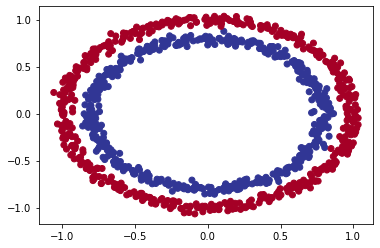

In [4]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.RdYlBu)

## Input and output shape of data

In [5]:
print(x.shape,y.shape)
print(len(x),len(y))

(1000, 2) (1000,)
1000 1000


# Creating model

In [14]:
import tensorflow as tf
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape=[2]),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model.compile(loss="binary_crossentropy",
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["accuracy"])

In [7]:
model.fit(x,y,epochs=5)

2022-01-02 15:07:44.444406: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/5


2022-01-02 15:07:44.651669: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 1s 8ms/step - loss: 0.6886 - accuracy: 0.5260
Epoch 2/5
32/32 [==============================] - 0s 6ms/step - loss: 0.6849 - accuracy: 0.5850
Epoch 3/5
32/32 [==============================] - 0s 7ms/step - loss: 0.6801 - accuracy: 0.5420
Epoch 4/5
32/32 [==============================] - 0s 7ms/step - loss: 0.6764 - accuracy: 0.6430
Epoch 5/5
32/32 [==============================] - 0s 6ms/step - loss: 0.6715 - accuracy: 0.5700


In [15]:
history = model.fit(x,y,epochs=30,verbose=0)

2022-01-02 15:34:26.627977: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [16]:
model.evaluate(x,y)

26/32 [=======================>......] - ETA: 0s - loss: 0.2839 - accuracy: 0.9940

2022-01-02 15:34:35.615443: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 0s 5ms/step - loss: 0.2843 - accuracy: 0.9940


[0.28428587317466736, 0.9940000176429749]

In [17]:
test_x,test_y = make_circles(n_samples,noise=0.03)

In [18]:
model.evaluate(test_x,test_y)

32/32 [==============================] - 0s 5ms/step - loss: 0.2794 - accuracy: 0.9970


[0.27936556935310364, 0.9970000386238098]

## Visualizing our models predictions with numpy Meshgrid
Create meshgrid of different x values and make predictions across the meshgrid. Plot the predictions as well as a line between zones(where each unique class falss)

In [12]:
import numpy as np

def plot_decision_boundary(model,x,y):
    """
    Plot the decision boundary created by a model predicting on X
    """
    x_min,x_max = x[:,0].min()-0.1,x[:,0].max()+0.1
    y_min,y_max = x[:,1].min()-0.1,x[:,1].max()+0.1
    xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),
                       np.linspace(y_min,y_max))
    # create x values 
    x_in = np.c_[xx.ravel(),yy.ravel()]
    
    # make predictions
    y_pred = model.predict(x_in)
    
    if len(y_pred[0]) > 1:
        print("Doing multiclass classification")
        y_pred = np.argmax(y_pred,axis=1).reshape(xx.shape)
    else:
        print("Binary class classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
        
    plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
    plt.scatter(x[:,0],x[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())

2022-01-02 15:08:17.708992: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Binary class classification


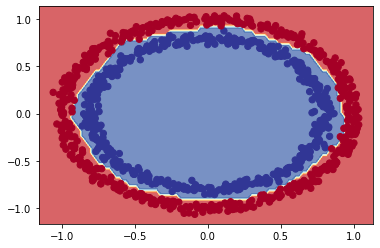

In [13]:
plot_decision_boundary(model,x,y)

In [19]:
accuracy = pd.DataFrame(history.history["accuracy"])

In [21]:
loss = pd.DataFrame(history.history["loss"])

<AxesSubplot:>

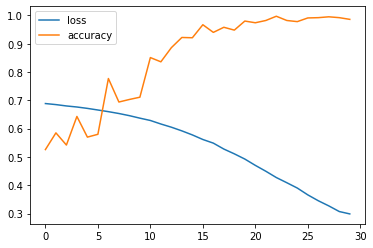

In [25]:
pd.DataFrame(history.history).plot()

## Using learning rate callback to find best learning rate


In [26]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model_9.compile(loss='binary_crossentropy',
               optimizer="Adam",
               metrics=["accuracy"])
# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))


history_9 = model_9.fit(x,y,epochs=100,callbacks=[lr_scheduler])

Epoch 1/100


2022-01-02 16:22:53.338775: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 1s 8ms/step - loss: 0.6932 - accuracy: 0.4990 - lr: 1.0000e-04
Epoch 2/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5070 - lr: 1.1220e-04
Epoch 3/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.4940 - lr: 1.2589e-04
Epoch 4/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6930 - accuracy: 0.5060 - lr: 1.4125e-04
Epoch 5/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6930 - accuracy: 0.4890 - lr: 1.5849e-04
Epoch 6/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6929 - accuracy: 0.4810 - lr: 1.7783e-04
Epoch 7/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6928 - accuracy: 0.4980 - lr: 1.9953e-04
Epoch 8/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6927 - accuracy: 0.5160 - lr: 2.2387e-04
Epoch 9/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6926 - ac

Epoch 73/100
32/32 [==============================] - 0s 7ms/step - loss: 0.5695 - accuracy: 0.7160 - lr: 0.3981
Epoch 74/100
32/32 [==============================] - 0s 7ms/step - loss: 0.5293 - accuracy: 0.7430 - lr: 0.4467
Epoch 75/100
32/32 [==============================] - 0s 7ms/step - loss: 0.5309 - accuracy: 0.7260 - lr: 0.5012
Epoch 76/100
32/32 [==============================] - 0s 7ms/step - loss: 0.5250 - accuracy: 0.7370 - lr: 0.5623
Epoch 77/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6872 - accuracy: 0.6020 - lr: 0.6310
Epoch 78/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6470 - accuracy: 0.6270 - lr: 0.7079
Epoch 79/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6830 - accuracy: 0.5300 - lr: 0.7943
Epoch 80/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6640 - accuracy: 0.5580 - lr: 0.8913
Epoch 81/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6720 - accuracy: 0.5

<AxesSubplot:xlabel='epochs'>

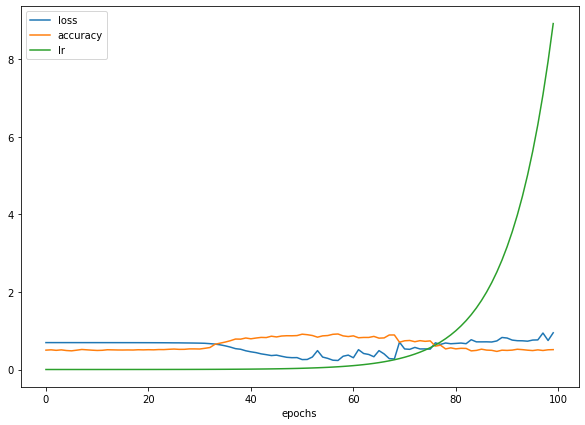

In [27]:
pd.DataFrame(history_9.history).plot(figsize=(10,7),xlabel="epochs")

In [29]:
plt.plot()

In [30]:
a

0.0001